<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week6%20-%20SQL2/Exercises/Solutions_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab SQL and Python

In [ ]:
# Example how to read from Python
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# create the database
db = create_engine('sqlite://', echo=False)

# first table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Players.csv'
df = pd.read_csv(csvfile)
table_name = "Players"
df.to_sql(table_name, con=db) # populate it with the data

# second table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Teams.csv'
df = pd.read_csv(csvfile)
table_name = "Teams"
df.to_sql(table_name, con=db) # populate it with the data



### <font color = 'green'>World Cup Data</font>

#### Take a look at a sample of the Players and Teams tables

In [ ]:
query = "SELECT * FROM Players LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,surname,team,position,minutes,shots,passes,tackles,saves
0,0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,1,Belhadj,Algeria,defender,270,1,146,8,0
2,2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,3,Bougherra,Algeria,defender,270,1,89,11,0
4,4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


In [ ]:
query = "SELECT * FROM Teams LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,0,Brazil,1,5,3,1,1,9,4,7,2
1,1,Spain,2,6,5,0,1,7,2,3,0
2,2,Portugal,3,4,1,2,1,7,1,8,1
3,3,Netherlands,4,6,6,0,0,12,5,15,0
4,4,Italy,5,3,0,2,1,4,5,5,0


## <font color = 'green'>World Cup Advanced Queries</font>

#### Question 1

Find all pairs of teams who have the same number of `goalsFor` against
each other and the same number of `goalsAgainst` against each other.
Return the teams and numbers of goalsFor and goalsAgainst.
Make sure to return each pair only once.

__Hint: You basically need to do a self join of the Teams table. For that you need to join different name aliases of the Teams table. checkout [here](https://www.w3schools.com/sql/sql_join_self.asp) for help.__

In [ ]:
query = """
select A.team AS team_1, B.team AS team_2, A.goalsFor, A.goalsAgainst
from Teams A, Teams B
where A.goalsFor = B.goalsFor and A.goalsAgainst=B.goalsAgainst and A.team <>B.team
"""
sql_df = pd.read_sql(query, con=db)
sql_df


,team_1,team_2,goalsFor,goalsAgainst
0,Italy,Mexico,4,5
1,England,Chile,3,5
2,England,Nigeria,3,5
3,England,South Africa,3,5
4,Greece,Cameroon,2,5
5,Mexico,Italy,4,5
6,Chile,England,3,5
7,Chile,Nigeria,3,5
8,Chile,South Africa,3,5
9,Cameroon,Greece,2,5


#### Question 2
Find all teams with ranking <30 where no player made more than 150 passes. Return the team and ranking.

__Hint: use HAVING clause (documentation [here](https://www.w3schools.com/sql/sql_having.asp))__

In [ ]:
query = """
select P.team, T.ranking, max(P.passes) as maxPasses
from Players P
join Teams T on T.team = P.team
where T.ranking < 30
group by P.team
having maxPasses<150
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,ranking,maxPasses
0,France,9,125
1,Nigeria,21,111
2,Switzerland,24,138


#### Question 3
Which team has the highest ratio of `goalsFor` to `goalsAgainst`?

In [ ]:
query = """
select team, goalsFor, goalsAgainst,goalsFor*1.0/goalsAgainst*1.0 as Ratio
from Teams
order by ratio desc
limit 1
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,goalsFor,goalsAgainst,Ratio
0,Portugal,7,1,7.0


#### Question 4
Find all teams whose defenders averaged more than 150 passes. Return the team and average number of passes by defenders, in descending order of average passes.

__Hint: again you may use the HAVING clause here__

In [ ]:
query = """
select team, position, avg(passes) as avg_Passes
from Players 
where position ='defender'
group by team
having avg_Passes > 150

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,position,avg_Passes
0,Brazil,defender,190.000000
1,Germany,defender,189.833333
2,Mexico,defender,152.142857
3,Netherlands,defender,182.500000
4,Spain,defender,213.000000


## <font color = 'green'>World Cup Basic Queries and Python</font>

### Question 1
Use seaborn to find if their is a correlation for players between: `shots`, `minutes`,`passes`, `tackles`. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f07f7d4c8d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


,index,minutes,shots,passes,tackles,saves
index,1.000000,0.072236,0.011117,0.011606,0.018683,0.013302
minutes,0.072236,1.000000,0.407923,0.815119,0.610673,0.228477
shots,0.011117,0.407923,1.000000,0.343163,0.176283,-0.154958
passes,0.011606,0.815119,0.343163,1.000000,0.702097,-0.062057
tackles,0.018683,0.610673,0.176283,0.702097,1.000000,-0.201190
saves,0.013302,0.228477,-0.154958,-0.062057,-0.201190,1.000000


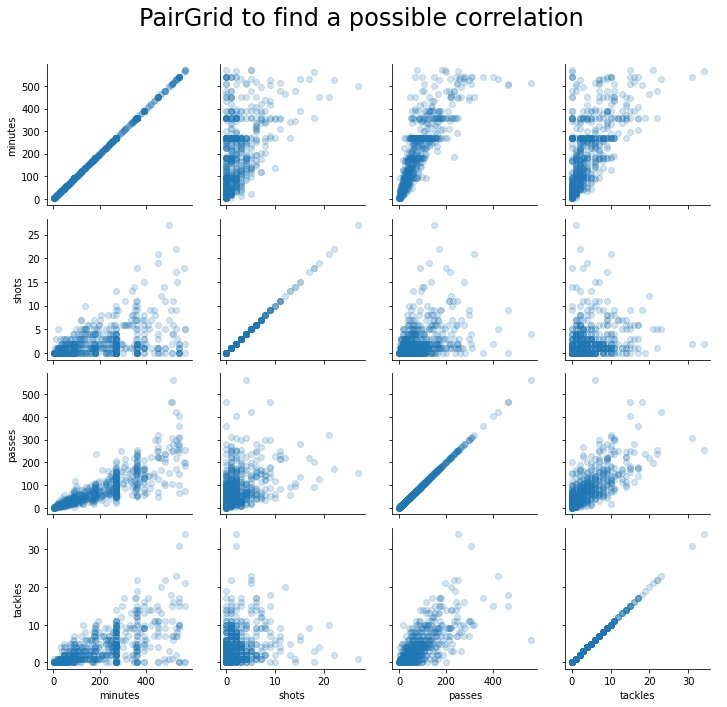

In [ ]:
#hints: you need to do a query and have a look of the last plot of the:"walkthroughs  week 3 BIA" 
query = "SELECT * FROM Players"

sql_df = pd.read_sql(query, con=db)
sql_df
g = sns.PairGrid(sql_df, vars=['minutes', 'shots', 'passes', 'tackles'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();

sql_df.corr(method='pearson')

###Question 2
Find the goalkeepers of teams that played more than four games. List the surname of the goalkeeper, the team, and the number of minutes the goalkeeper played.

**Hint: You should join the two tables**

In [ ]:
query = """
select P.surname, P.team, P.minutes
from Players P
join Teams T on T.team = P.team
where P.position like 'goalkeeper' and (P.minutes/90) >= 4
order by P.minutes desc
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,surname,team,minutes
0,Muslera,Uruguay,570
1,Neuer,Germany,540
2,Stekelenburg,Netherlands,540
3,Casillas,Spain,540
4,Kingson,Ghana,510
5,Villar,Paraguay,480
6,Romero,Argentina,450
7,Julio Cesar,Brazil,450
8,Kawashima,Japan,390
9,Howard,USA,390


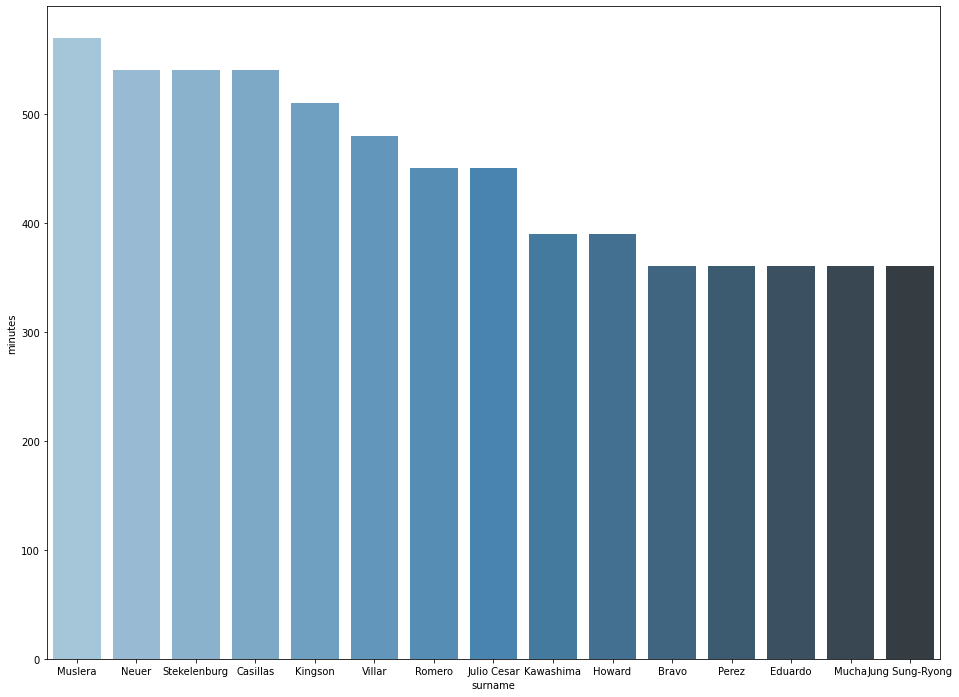

In [ ]:
fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(16, 12) #resize the figure
ax = sns.barplot(x="surname", y="minutes", data=sql_df, palette="Blues_d")
plt.show() 


## <font color = 'green'>World Cup Basic Queries</font>

### Question 1
What player on a team with “ia” in the team name played less than 200 minutes and made more than 100 passes? Return the player surname and team.

**Hint: To check if attribute A contains string S use \"A like '%S%'"**

In [ ]:
query = """
select surname, team 
from Players 
where Players.team like '%ia%' AND Players.minutes < 200 
AND Players.passes > 100
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,surname,team
0,Kuzmanovic,Serbia


###Question 2
Return players names, their teams and the ranking of their team.

In [ ]:
query = """
SELECT  Players.surname, Teams.team, ranking
FROM Teams, Players
WHERE Players.team = Teams.team"""
sql_df = pd.read_sql(query, con=db)
sql_df

,surname,team,ranking
0,Baptista,Brazil,1
1,Daniel Alves,Brazil,1
2,Elano,Brazil,1
3,Fabiano,Brazil,1
4,Gilberto,Brazil,1
...,...,...,...
590,Pak Chol-Jin,North Korea,105
591,Pak Nam-Chol,North Korea,105
592,Ri Jun-Il,North Korea,105
593,Ri Kwang-Chon,North Korea,105


### Question 3
How many players who play on a team with ranking <10 played more than 350 minutes? Return one number in a column named 'superstar'.*

__Hint: use "SELECT ... AS new_col_name" to rename a column__

In [ ]:
query = """
select count(P.surname) as 'superstar'
from Players P
join Teams T on T.team = P.team
where P.minutes > 350 and T.ranking < 10

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,superstar
0,54


### Question 4
What is the average number of passes made by forwards? By midfielders? Write one query that returns both values with the corresponding position.

__Hint: use the GROUP BY clause__

__Hint: when selecting columns you can use AVG, SUM or COUNT clauses to calculate aggregates__

In [ ]:
query = """
select P.position, round(avg(P.passes)) as 'moyenne de passe'
from Players P
where P.position = "forward" or P.position = "midfielder"
group by P.position
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,position,moyenne de passe
0,forward,51.0
1,midfielder,95.0


### Question 5
 Find all players who made more than 20 shots. Return all player information in descending order of shots made.

**Hint: SQL ordering syntax: "ORDER BY column1, column2,... ASC|DESC\"**

In [ ]:
query = """
select * 
from Players 
where Players.shots > 20 
order by Players.shots desc
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,index,surname,team,position,minutes,shots,passes,tackles,saves
0,200,Gyan,Ghana,forward,501,27,151,1,0
1,535,Villa,Spain,forward,529,22,169,2,0
2,28,Messi,Argentina,forward,450,21,321,10,0


###Question 6
Which team has the highest average number of passes per minute played? Return the team and average passes per minute.

**Hint 1: You can compute a team's average number of passes per minute played by dividing the total number of passes by the total number of minutes. To force floating point division, multiply one operand by 1.0.**

**Hint 2: Consider using Limit.**

In [ ]:
query = """
select T.team, 1.0*sum(P.passes)/(90.0*T.games) as PpMin_played
from Players P
join Teams T on T.team = P.team
group by T.team
order by PpMin_played desc
limit 1

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,PpMin_played
0,Spain,6.853704
